Jason Cain, Nathan Harms, Marissa Puzan
## Serotonin transport modeling 


Laminar flow model:

## $$ \frac{C_m}{C_o} = \sum_{n} M_n e^{- \beta^2 Gz} $$



from
$$v_z \frac{\partial C}{\partial z} = D \frac{1}{r} \frac{\partial}{\partial r} \left( r \frac{\partial C}{\partial r} \right)$$
where 

$$ Gz = \frac{D L}{V_m R^2} $$

$$ P_w^* = P_w \left( \frac{R}{D} \right) $$

$$ M_n = f( P_w^* ) $$ 

$$ \beta = f( P_w^* ) $$ 

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from collections import namedtuple

In [2]:
import laminarFlow


In [3]:

ConditionSet = namedtuple('ConditionSet', ['Concentration', 'Diffusivity', 'Permeability'])
KineticsParamers = namedtuple('ConditionSet', ['vmax1', 'Km1', 'K1', 'vmax2', 'Km2', 'K2'])


serCondition = ConditionSet(
                Concentration = 0,
                Diffusivity = 6.2424e-8,
                Permeability =7.576e-13)

trypCondition = ConditionSet(
                Concentration = .1,
                Diffusivity = 5.386e-8,
                Permeability = 6.44e-4)

htpCondition = ConditionSet(
                Concentration = 0,
                Diffusivity = 4.995e-8,
                Permeability = 7.576e-13)

kinetics = KineticsParamers(vmax1 = 0.1868167,
                            Km1 = 1.43533284,
                            K1 = 0.43680929,
                            vmax2 = 9.97704964,
                            Km2 = 2.37430847,
                            K2 = 0.25340153)

wallKinetics = KineticsParamers(vmax1 = 0.1868167,
                            Km1 = 1.43533284,
                            K1 = 0.43680929,
                            vmax2 = 9.97704964,
                            Km2 = 2.37430847,
                            K2 = 0.25340153)

# kinetics = KineticsParamers(vmax1 = 0,
#                             Km1 = 1,
#                             K1 = 1,
#                             vmax2 = 0,
#                             Km2 = 1,
#                             K2 = 1)

# wallKinetics = KineticsParamers(vmax1 = 0,
#                             Km1 = 1,
#                             K1 = 1,
#                             vmax2 = 0,
#                             Km2 = 1,
#                             K2 = 1)

radius = 2.5/100
length = 7.5
max_velocity = .0287/60
timestep = 60/3600
rings = 20
sections = 500

Model = laminarFlow.LaminarFlow(length, radius, max_velocity, trypCondition, htpCondition, serCondition, kinetics, wallKinetics, rings, sections, timestep)

Running 1 of 261
Running 2 of 261
Running 3 of 261
Running 4 of 261
Running 5 of 261
Running 6 of 261
Running 7 of 261
Running 8 of 261
Running 9 of 261
Running 10 of 261
Running 11 of 261
Running 12 of 261
Running 13 of 261
Running 14 of 261
Running 15 of 261
Running 16 of 261
Running 17 of 261
Running 18 of 261
Running 19 of 261
Running 20 of 261
Running 21 of 261
Running 22 of 261
Running 23 of 261
Running 24 of 261
Running 25 of 261
Running 26 of 261
Running 27 of 261
Running 28 of 261
Running 29 of 261
Running 30 of 261
Running 31 of 261
Running 32 of 261
Running 33 of 261
Running 34 of 261
Running 35 of 261
Running 36 of 261
Running 37 of 261
Running 38 of 261
Running 39 of 261
Running 40 of 261
Running 41 of 261
Running 42 of 261
Running 43 of 261
Running 44 of 261
Running 45 of 261
Running 46 of 261
Running 47 of 261
Running 48 of 261
Running 49 of 261
Running 50 of 261
Running 51 of 261
Running 52 of 261
Running 53 of 261
Running 54 of 261
Running 55 of 261
Running 56 of 261
R

/Users/nathan/Code/CHME5137/serotonin-transport/laminarFlow.py:263: RuntimeWarning: divide by zero encountered in true_divide
  first_der[i,:] = first_der[i,:]/rArray[i]
/Users/nathan/Code/CHME5137/serotonin-transport/laminarFlow.py:263: RuntimeWarning: invalid value encountered in true_divide
  first_der[i,:] = first_der[i,:]/rArray[i]


Running 84 of 261
Running 85 of 261
Running 86 of 261
Running 87 of 261
Running 88 of 261
Running 89 of 261
Running 90 of 261
Running 91 of 261
Running 92 of 261
Running 93 of 261
Running 94 of 261
Running 95 of 261
Running 96 of 261
Running 97 of 261
Running 98 of 261
Running 99 of 261
Running 100 of 261
Running 101 of 261
Running 102 of 261
Running 103 of 261
Running 104 of 261
Running 105 of 261
Running 106 of 261
Running 107 of 261
Running 108 of 261
Running 109 of 261
Running 110 of 261
Running 111 of 261
Running 112 of 261
Running 113 of 261
Running 114 of 261
Running 115 of 261
Running 116 of 261
Running 117 of 261
Running 118 of 261
Running 119 of 261
Running 120 of 261
Running 121 of 261
Running 122 of 261
Running 123 of 261
Running 124 of 261
Running 125 of 261
Running 126 of 261
Running 127 of 261
Running 128 of 261
Running 129 of 261
Running 130 of 261
Running 131 of 261
Running 132 of 261
Running 133 of 261
Running 134 of 261
Running 135 of 261
Running 136 of 261
Running 1

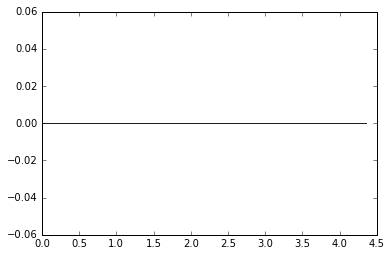

In [4]:
plt.plot( Model.time, Model.serotoninUptake)

In [5]:
print(Model.trypConcentration[30,-1,0:20])

print(Model.time)

[  1.94671102e-11   1.94671102e-11   1.00558910e-11   3.23882514e-12
   7.30091928e-13   1.23526670e-13   1.64119211e-14   1.76601364e-15
   1.57340127e-16   1.17958938e-17   7.53238640e-19   4.13441731e-20
   1.96406565e-21   8.11611725e-23   2.92768619e-24   9.23943093e-26
   2.55357052e-27   6.17970296e-29   1.30777214e-30   2.41395412e-32]
[ 0.          0.01666667  0.03333333  0.05        0.06666667  0.08333333
  0.1         0.11666667  0.13333333  0.15        0.16666667  0.18333333
  0.2         0.21666667  0.23333333  0.25        0.26666667  0.28333333
  0.3         0.31666667  0.33333333  0.35        0.36666667  0.38333333
  0.4         0.41666667  0.43333333  0.45        0.46666667  0.48333333
  0.5         0.51666667  0.53333333  0.55        0.56666667  0.58333333
  0.6         0.61666667  0.63333333  0.65        0.66666667  0.68333333
  0.7         0.71666667  0.73333333  0.75        0.76666667  0.78333333
  0.8         0.81666667  0.83333333  0.85        0.86666667  0.883333

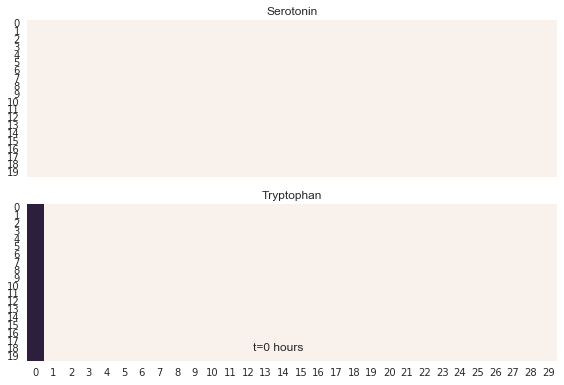

In [6]:
from matplotlib import animation
import matplotlib
import seaborn as sns


matplotlib.rc('animation', html='html5')
fig, axarr = plt.subplots(2, sharex = True)
timestamp = fig.text(0.45,0.1,'timestamp')
frames = 120
def animate(i):
    step = i * len(Model.time)//(frames)
    serotonin = Model.serConcentration[step,:,:30]
    tryp = Model.trypConcentration[step,:,:30]
    sns.heatmap(serotonin, vmin=0,vmax=1e-1, ax=axarr[0], cbar = None)
    axarr[0].set_title('Serotonin')
    sns.heatmap(tryp, vmin=0,vmax=1e-1, ax=axarr[1], cbar=None)
    axarr[1].set_title('Tryptophan')
    timestamp.set_text('t={0:.0f} hours'.format(Model.time[step]))
    plt.tight_layout()
    
anim = animation.FuncAnimation(fig, animate, frames=frames, repeat_delay=2000, repeat=True)
anim

In [7]:
from SALib.sample.saltelli import sample as ss
from SALib.analyze.sobol import analyze as sa


In [8]:
def laminarModel(data):
    trypCondition = ConditionSet(
                Concentration = data[3],
                Diffusivity = data[4],
                Permeability = data[5])

    htpCondition = ConditionSet(
                Concentration = data[6],
                Diffusivity = data[7],
                Permeability = data[8])

    serCondition = ConditionSet(
                Concentration = data[9],
                Diffusivity = data[10],
                Permeability = data[11])
    
    kinetics = KineticsParamers(vmax1 = data[12],
                            Km1 = data[13],
                            K1 = data[14],
                            vmax2 = data[15],
                            Km2 = data[16],
                            K2 = data[17])
    
    wallKinetics = KineticsParamers(vmax1 = data[18],
                            Km1 = data[19],
                            K1 = data[20],
                            vmax2 = data[21],
                            Km2 = data[22],
                            K2 = data[23])

    
    iterations = 1000
    
    Model = laminarFlow.LaminarFlow(data[0],data[1],data[2],
                                    serCondition, trypCondition, htpCondition, 
                                    kinetics, wallKinetics, 
                                    iterations)

In [9]:


# morris_problem = {
#     # There are six variables
#     'num_vars': 23,
#     # These are their names
#     'names': ['length', 'radius', 'max_velocity', 'serConc', 'serDiff', 
#               'serPerm', 'tryConc', 'tryDiff', 'tryPerm','vmax1', 'Km1', 'K1', 'vmax2', 'Km2', 'K2'],
#     # These are their plausible ranges over which we'll move the variables
#     'bounds': [[,], # length (m)
#                [,], # radius (m)
#                [,], # max_velocity (m/s)
#                [,], # Tryptophan Concentration
#                [,], # Tryptophan Diffusivity
#                [,], # Tryptophan Wall Permabilityhttp://localhost:8888/notebooks/SerotoninTransportModel.ipynb#
#                [,], # 5HTP Concentration
#                [,], # 5HTP Diffusivity
#                [,], # 5HTP Wall Permability
#                [,], # Serotonin Concentration (mM)
#                [,], # Serotonin Diffusivity 
#                [,], # Serotonin Wall Permeability 
#                [,], # Max rate of Tryp -> 5HTP
#                [,], # Michaelus Menton Constant Tryp -> 5HTP
#                [,], # Equilibrium Constant for 5HTP and Tryp
#                [,], # Max rate of 5HTP -> Serotonin
#                [,], # Michaelus Menton Constant 5HTP -> Serotonin
#                [,], # Equilibrium Constant for 5HTP and Serotonin
#                [,], # Max wall rate of Tryp -> 5HTP
#                [,], # Michaelus Menton Constant @ wall Tryp -> 5HTP
#                [,], # Equilibrium Constant for 5HTP and Tryp @ wall
#                [,], # Max rate of 5HTP -> Serotonin @ wall
#                [,], # Michaelus Menton Constant 5HTP -> Serotonin @ wall
#                [,], # Equilibrium Constant for 5HTP and Serotonin @ wall

#               ],
#     # I don't want to group any of these variables together
#     'groups': None
#     }